In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#read csv of the raw sensor data for accelerometer x, y and z and merged into dataframe (df) of activity
#lying
lying_df_x = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_lying_2025-10-13_15-00-19-755355_AX.csv')
lying_df_y = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_lying_2025-10-13_15-00-19-755355_AY.csv')
lying_df_z = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_lying_2025-10-13_15-00-19-755355_AZ.csv')

lying_df_Axyz = pd.merge(lying_df_x, lying_df_y[['EmotiBitTimestamp', 'AY']], on='EmotiBitTimestamp', how='inner')
lying_df_Axyz = pd.merge(lying_df_Axyz, lying_df_z[['EmotiBitTimestamp', 'AZ']], on='EmotiBitTimestamp', how='inner')

#running
running_df_x = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_running_2025-10-13_14-56-34-469534_AX.csv')
running_df_y = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_running_2025-10-13_14-56-34-469534_AY.csv')
running_df_z = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_running_2025-10-13_14-56-34-469534_AZ.csv')

running_df_Axyz = pd.merge(running_df_x, running_df_y[['EmotiBitTimestamp', 'AY']], on='EmotiBitTimestamp', how='inner')
running_df_Axyz = pd.merge(running_df_Axyz, running_df_z[['EmotiBitTimestamp', 'AZ']], on='EmotiBitTimestamp', how='inner')

#sitting
sitting_df_x = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_sitting_2025-10-13_14-50-00-005312_AX.csv')
sitting_df_y = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_sitting_2025-10-13_14-50-00-005312_AY.csv')
sitting_df_z = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_sitting_2025-10-13_14-50-00-005312_AZ.csv')

sitting_df_Axyz = pd.merge(sitting_df_x, sitting_df_y[['EmotiBitTimestamp', 'AY']], on='EmotiBitTimestamp', how='inner')
sitting_df_Axyz = pd.merge(sitting_df_Axyz, sitting_df_z[['EmotiBitTimestamp', 'AZ']], on='EmotiBitTimestamp', how='inner')

#walking
walking_df_x = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_walking_2025-10-13_14-53-46-999707_AX.csv')
walking_df_y = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_walking_2025-10-13_14-53-46-999707_AY.csv')
walking_df_z = pd.read_csv('https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/refs/heads/main/data/raw/LL_walking_2025-10-13_14-53-46-999707_AZ.csv')

walking_df_Axyz = pd.merge(walking_df_x, walking_df_y[['EmotiBitTimestamp', 'AY']], on='EmotiBitTimestamp', how='inner')
walking_df_Axyz = pd.merge(walking_df_Axyz, walking_df_z[['EmotiBitTimestamp', 'AZ']], on='EmotiBitTimestamp', how='inner')


#remove unecessary columns
#remove columns 'PacketNumber', 'DataLength', 'TypeTag', 'ProtocolVersion'
lying_df_Axyz.drop(['PacketNumber', 'DataLength', 'TypeTag', 'ProtocolVersion'], axis=1, inplace=True)
running_df_Axyz.drop(['PacketNumber', 'DataLength', 'TypeTag', 'ProtocolVersion'], axis=1, inplace=True)
sitting_df_Axyz.drop(['PacketNumber', 'DataLength', 'TypeTag', 'ProtocolVersion'], axis=1, inplace=True)
walking_df_Axyz.drop(['PacketNumber', 'DataLength', 'TypeTag', 'ProtocolVersion'], axis=1, inplace=True)


#print first 5 rows (head)
print(lying_df_Axyz.head(5))
print("-----------------------------------------")
print(running_df_Axyz.head(5))
print("-----------------------------------------")
print(sitting_df_Axyz.head(5))
print("-----------------------------------------")
print(walking_df_Axyz.head(5))


   LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ
0    1.760382e+09          1325026.0              100  0.596 -0.158  0.754
1    1.760382e+09          1325066.0              100  0.710 -0.130  0.746
2    1.760382e+09          1325106.0              100  0.670 -0.147  0.745
3    1.760382e+09          1325146.0              100  0.664 -0.165  0.730
4    1.760382e+09          1325186.0              100  0.688 -0.156  0.732
-----------------------------------------
   LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ
0    1.760382e+09          1099822.0              100 -1.621 -2.957 -0.383
1    1.760382e+09          1099822.0              100 -1.621 -2.957 -0.198
2    1.760382e+09          1099822.0              100 -1.621 -2.957 -0.116
3    1.760382e+09          1099822.0              100 -1.621 -2.546 -0.383
4    1.760382e+09          1099822.0              100 -1.621 -2.546 -0.198
-----------------------------------------
   LocalTimestam

In [ ]:
#add the accelaration magnitude calculation
#sqrt(x²+y²+z²)
#print 5 first rows (head)

#lying mag
lying_df_Axyz['mag'] = np.sqrt(np.square(lying_df_Axyz['AX']) + np.square(lying_df_Axyz['AY']) + np.square(lying_df_Axyz['AZ']))

#running mag
running_df_Axyz['mag'] = np.sqrt(np.square(running_df_Axyz['AX']) + np.square(running_df_Axyz['AY']) + np.square(running_df_Axyz['AZ']))

#sitting mag
sitting_df_Axyz['mag'] = np.sqrt(np.square(sitting_df_Axyz['AX']) + np.square(sitting_df_Axyz['AY']) + np.square(sitting_df_Axyz['AZ']))

#walking mag
walking_df_Axyz['mag'] = np.sqrt(np.square(walking_df_Axyz['AX']) + np.square(walking_df_Axyz['AY']) + np.square(walking_df_Axyz['AZ']))
print(walking_df_Axyz.head(5))

#print first 5 rows
print(lying_df_Axyz.head(5))
print(running_df_Axyz.head(5))
print(sitting_df_Axyz.head(5))
print(walking_df_Axyz.head(5))

   LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ  \
0    1.760382e+09           932345.0              100 -0.015 -1.424  0.290   
1    1.760382e+09           932345.0              100 -0.015 -1.424  0.259   
2    1.760382e+09           932345.0              100 -0.015 -1.424  0.192   
3    1.760382e+09           932345.0              100 -0.015 -1.237  0.290   
4    1.760382e+09           932345.0              100 -0.015 -1.237  0.259   

        mag  
0  1.453307  
1  1.447440  
2  1.436964  
3  1.270627  
4  1.263913  
   LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ  \
0    1.760382e+09          1325026.0              100  0.596 -0.158  0.754   
1    1.760382e+09          1325066.0              100  0.710 -0.130  0.746   
2    1.760382e+09          1325106.0              100  0.670 -0.147  0.745   
3    1.760382e+09          1325146.0              100  0.664 -0.165  0.730   
4    1.760382e+09          1325186.0              100  0.

In [ ]:
#last 5 records of df (tail)
print(lying_df_Axyz.tail(5))
print(running_df_Axyz.tail(5))
print(sitting_df_Axyz.tail(5))
print(walking_df_Axyz.tail(5))

      LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ  \
3121    1.760382e+09          1449387.0              100  0.720 -0.167  0.735   
3122    1.760382e+09          1449427.0              100  0.710 -0.123  0.736   
3123    1.760382e+09          1449467.0              100  0.676 -0.118  0.733   
3124    1.760382e+09          1449507.0              100  0.754 -0.107  0.737   
3125    1.760382e+09          1449547.0              100  0.749 -0.141  0.748   

           mag  
3121  1.042360  
3122  1.030012  
3123  1.004086  
3124  1.059780  
3125  1.067889  
      LocalTimestamp  EmotiBitTimestamp  DataReliability     AX     AY     AZ  \
3246    1.760382e+09          1228116.0              100 -0.417 -0.355 -0.371   
3247    1.760382e+09          1228156.0              100 -1.496 -1.375 -0.216   
3248    1.760382e+09          1228196.0              100 -1.727 -1.995 -0.186   
3249    1.760382e+09          1228236.0              100 -0.692 -1.990 -0.044   
3250  

In [ ]:
#num of duplicates
print(lying_df_Axyz.duplicated().sum(),
running_df_Axyz.duplicated().sum(),
sitting_df_Axyz.duplicated().sum(),
walking_df_Axyz.duplicated().sum())

0 0 0 0


In [ ]:
#shape of the dataframe
lying_df_Axyz.shape

(3126, 7)

In [ ]:
running_df_Axyz.shape

(3251, 7)

In [ ]:
sitting_df_Axyz.shape

(3253, 7)

In [ ]:
walking_df_Axyz.shape

(3178, 7)

In [ ]:
#info on columns of each activity df
lying_df_Axyz.info()

running_df_Axyz.info()

sitting_df_Axyz.info()

walking_df_Axyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LocalTimestamp     3126 non-null   float64
 1   EmotiBitTimestamp  3126 non-null   float64
 2   DataReliability    3126 non-null   int64  
 3   AX                 3126 non-null   float64
 4   AY                 3126 non-null   float64
 5   AZ                 3126 non-null   float64
 6   mag                3126 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LocalTimestamp     3251 non-null   float64
 1   EmotiBitTimestamp  3251 non-null   float64
 2   DataReliability    3251 non-null   int64  
 3   AX                 3251 non-null   float64
 4   AY         

In [ ]:
#null records
lying_df_Axyz.isnull().sum()

LocalTimestamp       0
EmotiBitTimestamp    0
DataReliability      0
AX                   0
AY                   0
AZ                   0
mag                  0
dtype: int64

In [ ]:
running_df_Axyz.isnull().sum()

LocalTimestamp       0
EmotiBitTimestamp    0
PacketNumber         0
DataLength           0
TypeTag              0
ProtocolVersion      0
DataReliability      0
AX                   0
AY                   0
AZ                   0
mag                  0
dtype: int64

In [ ]:
sitting_df_Axyz.isnull().sum()

LocalTimestamp       0
EmotiBitTimestamp    0
PacketNumber         0
DataLength           0
TypeTag              0
ProtocolVersion      0
DataReliability      0
AX                   0
AY                   0
AZ                   0
mag                  2
dtype: int64

In [ ]:
walking_df_Axyz.isnull().sum()

LocalTimestamp       0
EmotiBitTimestamp    0
PacketNumber         0
DataLength           0
TypeTag              0
ProtocolVersion      0
DataReliability      0
AX                   0
AY                   0
AZ                   0
mag                  0
dtype: int64

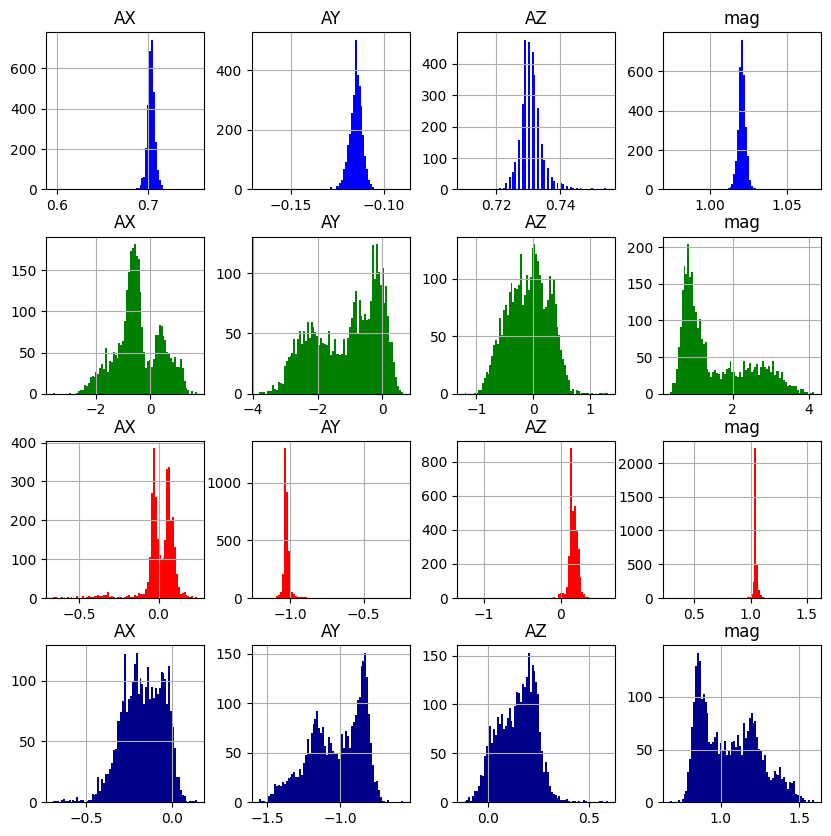

In [ ]:
#histogram

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

#specific col
cols_data = ['AX', 'AY', 'AZ', 'mag']


lying_df_Axyz[cols_data].hist(bins=75, ax=axs[0], color='blue')

running_df_Axyz[cols_data].hist(bins=75, ax=axs[1], color='green')

sitting_df_Axyz[cols_data].hist(bins=75, ax=axs[2], color='red')

walking_df_Axyz[cols_data].hist(bins=75, ax=axs[3], color='darkblue')


plt.show()


<Axes: title={'center': 'mag vs EmotiBitTimestamp'}, xlabel='mag', ylabel='EmotiBitTimestamp'>

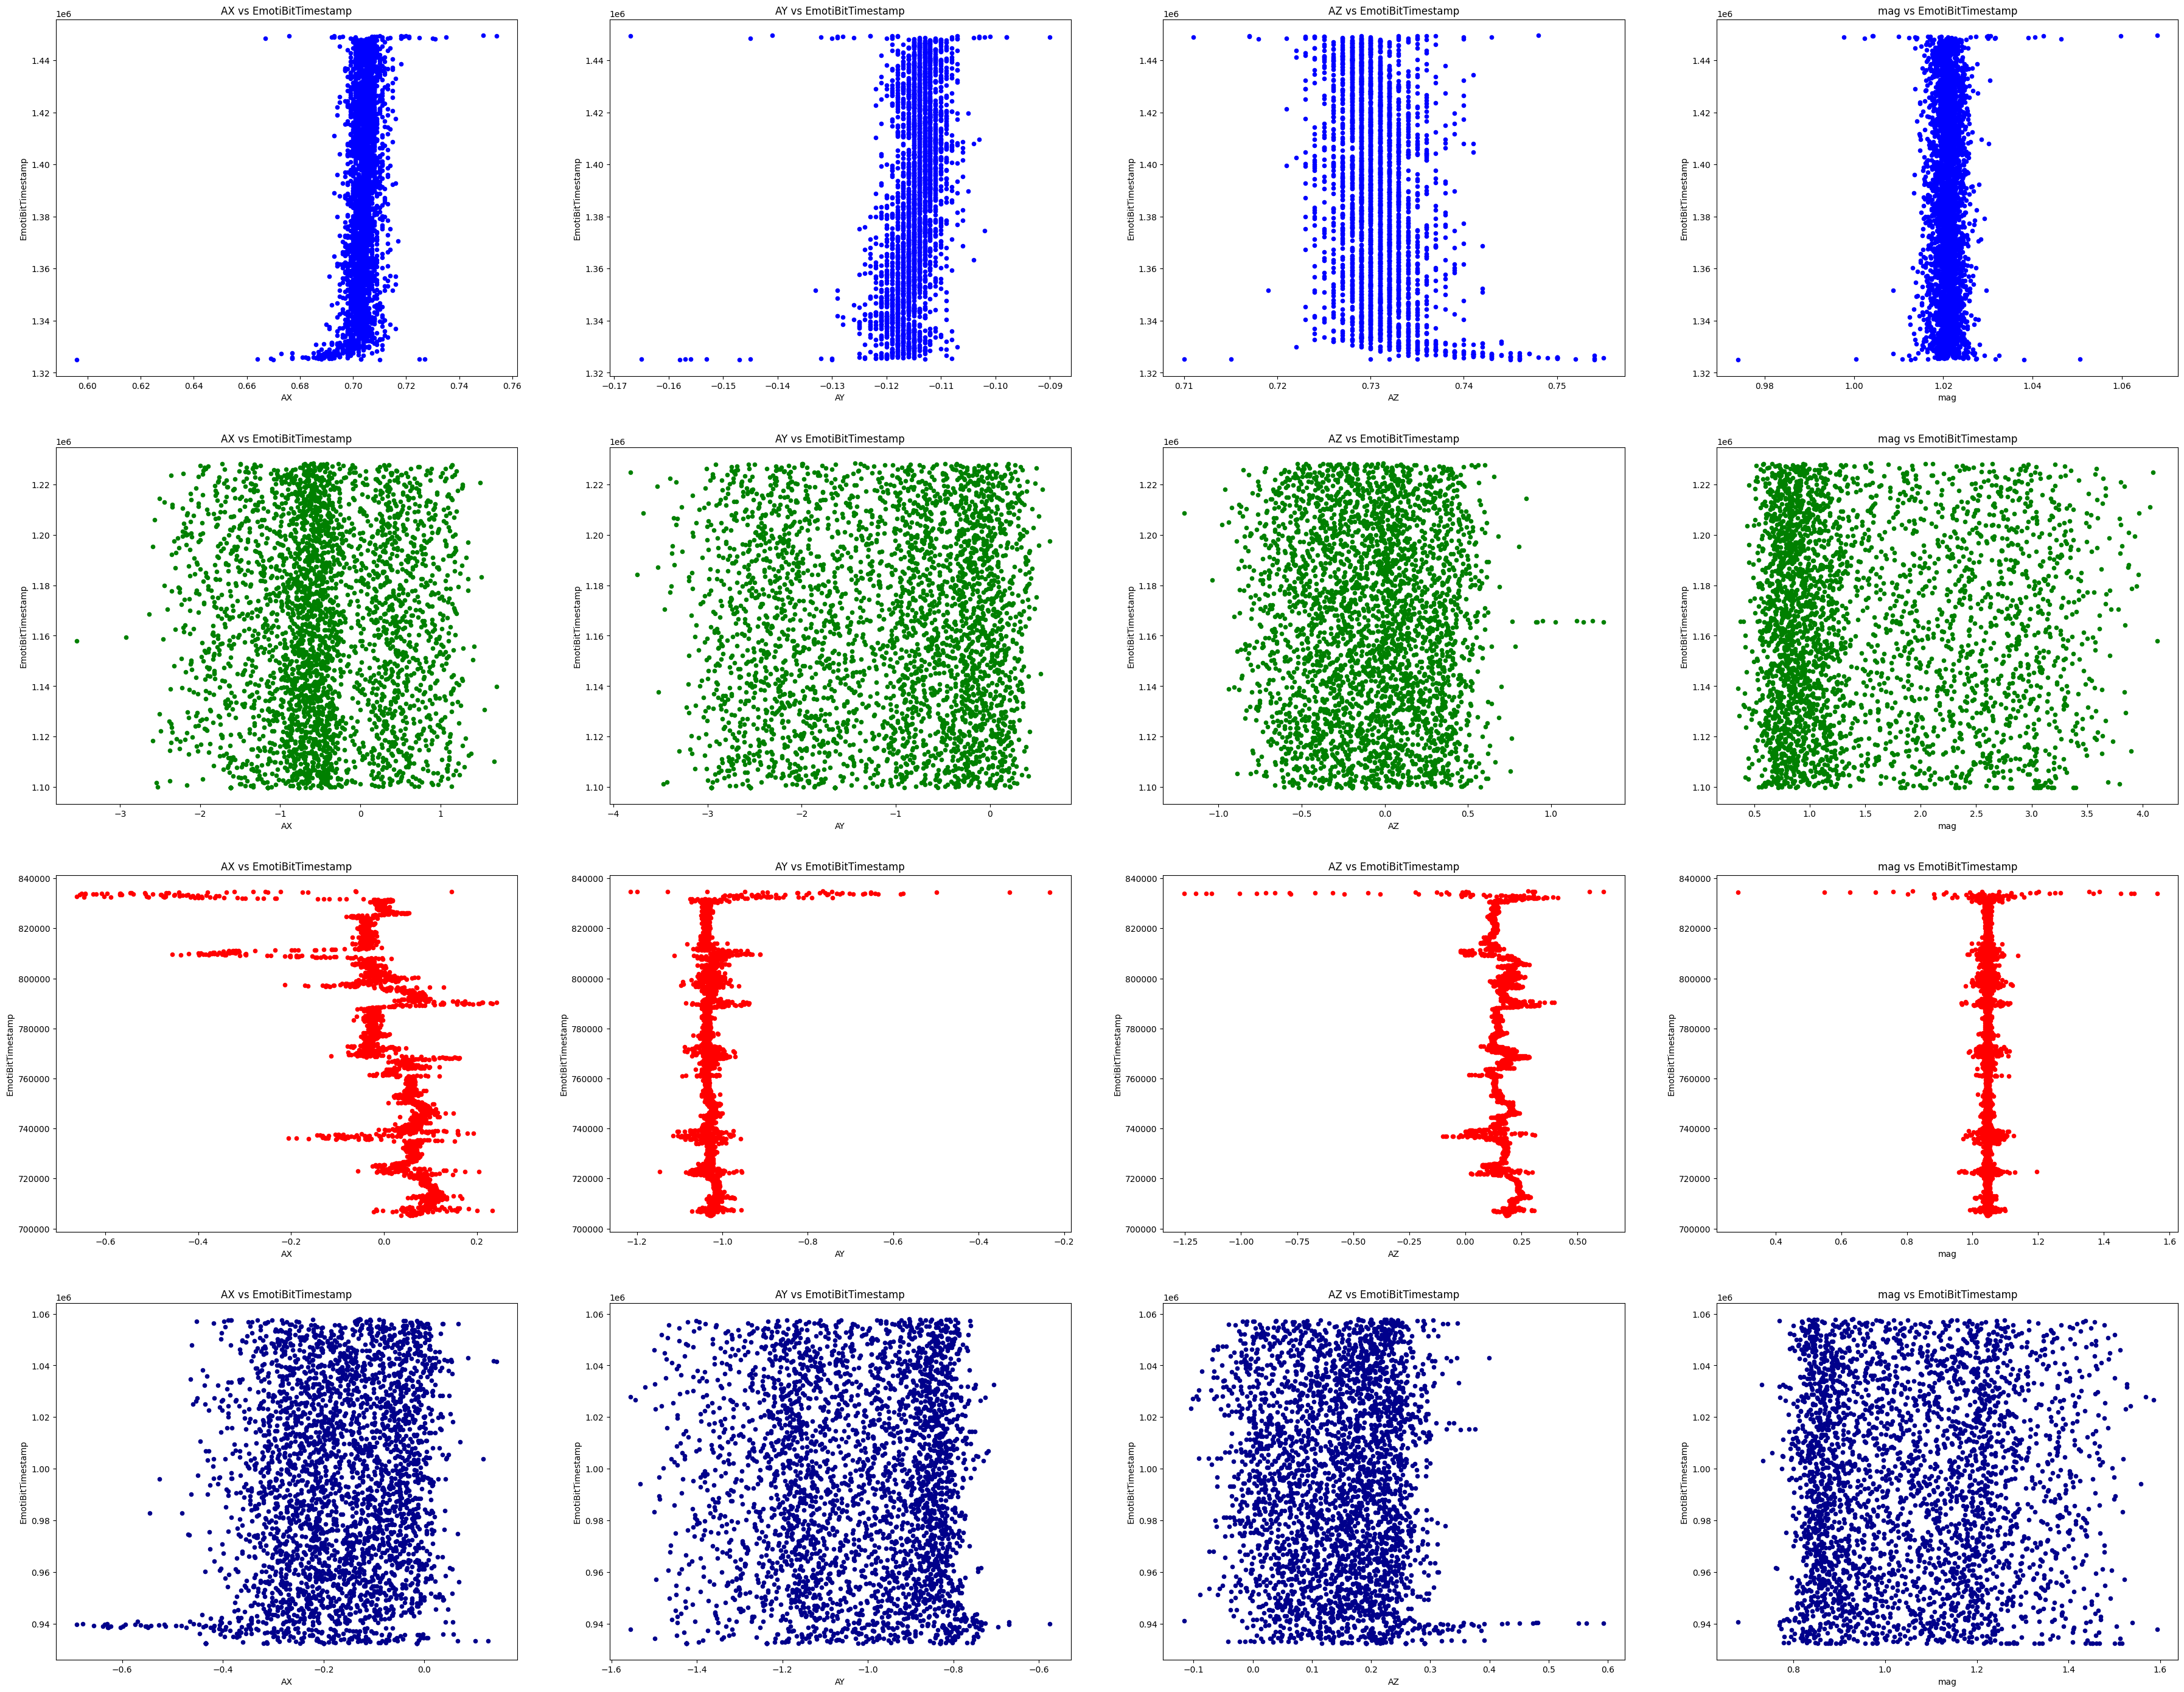

In [ ]:
#scatterplot

fig, axes = plt.subplots(4, 4, figsize=(45, 35))

#lying
lying_df_Axyz.plot.scatter(x='AX', y='EmotiBitTimestamp', ax=axes[0,0], color='blue', title='AX vs EmotiBitTimestamp')
lying_df_Axyz.plot.scatter(x='AY', y='EmotiBitTimestamp', ax=axes[0,1], color='blue', title='AY vs EmotiBitTimestamp')
lying_df_Axyz.plot.scatter(x='AZ', y='EmotiBitTimestamp', ax=axes[0,2], color='blue', title='AZ vs EmotiBitTimestamp')
lying_df_Axyz.plot.scatter(x='mag', y='EmotiBitTimestamp', ax=axes[0,3], color='blue', title='mag vs EmotiBitTimestamp')

#running
running_df_Axyz.plot.scatter(x='AX', y='EmotiBitTimestamp', ax=axes[1,0], color='green', title='AX vs EmotiBitTimestamp')
running_df_Axyz.plot.scatter(x='AY', y='EmotiBitTimestamp', ax=axes[1,1], color='green', title='AY vs EmotiBitTimestamp')
running_df_Axyz.plot.scatter(x='AZ', y='EmotiBitTimestamp', ax=axes[1,2], color='green', title='AZ vs EmotiBitTimestamp')
running_df_Axyz.plot.scatter(x='mag', y='EmotiBitTimestamp', ax=axes[1,3], color='green', title='mag vs EmotiBitTimestamp')

#sitting
sitting_df_Axyz.plot.scatter(x='AX', y='EmotiBitTimestamp', ax=axes[2,0], color='red', title='AX vs EmotiBitTimestamp')
sitting_df_Axyz.plot.scatter(x='AY', y='EmotiBitTimestamp', ax=axes[2,1], color='red', title='AY vs EmotiBitTimestamp')
sitting_df_Axyz.plot.scatter(x='AZ', y='EmotiBitTimestamp', ax=axes[2,2], color='red', title='AZ vs EmotiBitTimestamp')
sitting_df_Axyz.plot.scatter(x='mag', y='EmotiBitTimestamp', ax=axes[2,3], color='red', title='mag vs EmotiBitTimestamp')

#waling
walking_df_Axyz.plot.scatter(x='AX', y='EmotiBitTimestamp', ax=axes[3,0], color='darkblue', title='AX vs EmotiBitTimestamp')
walking_df_Axyz.plot.scatter(x='AY', y='EmotiBitTimestamp', ax=axes[3,1], color='darkblue', title='AY vs EmotiBitTimestamp')
walking_df_Axyz.plot.scatter(x='AZ', y='EmotiBitTimestamp', ax=axes[3,2], color='darkblue', title='AZ vs EmotiBitTimestamp')
walking_df_Axyz.plot.scatter(x='mag', y='EmotiBitTimestamp', ax=axes[3,3], color='darkblue', title='mag vs EmotiBitTimestamp')




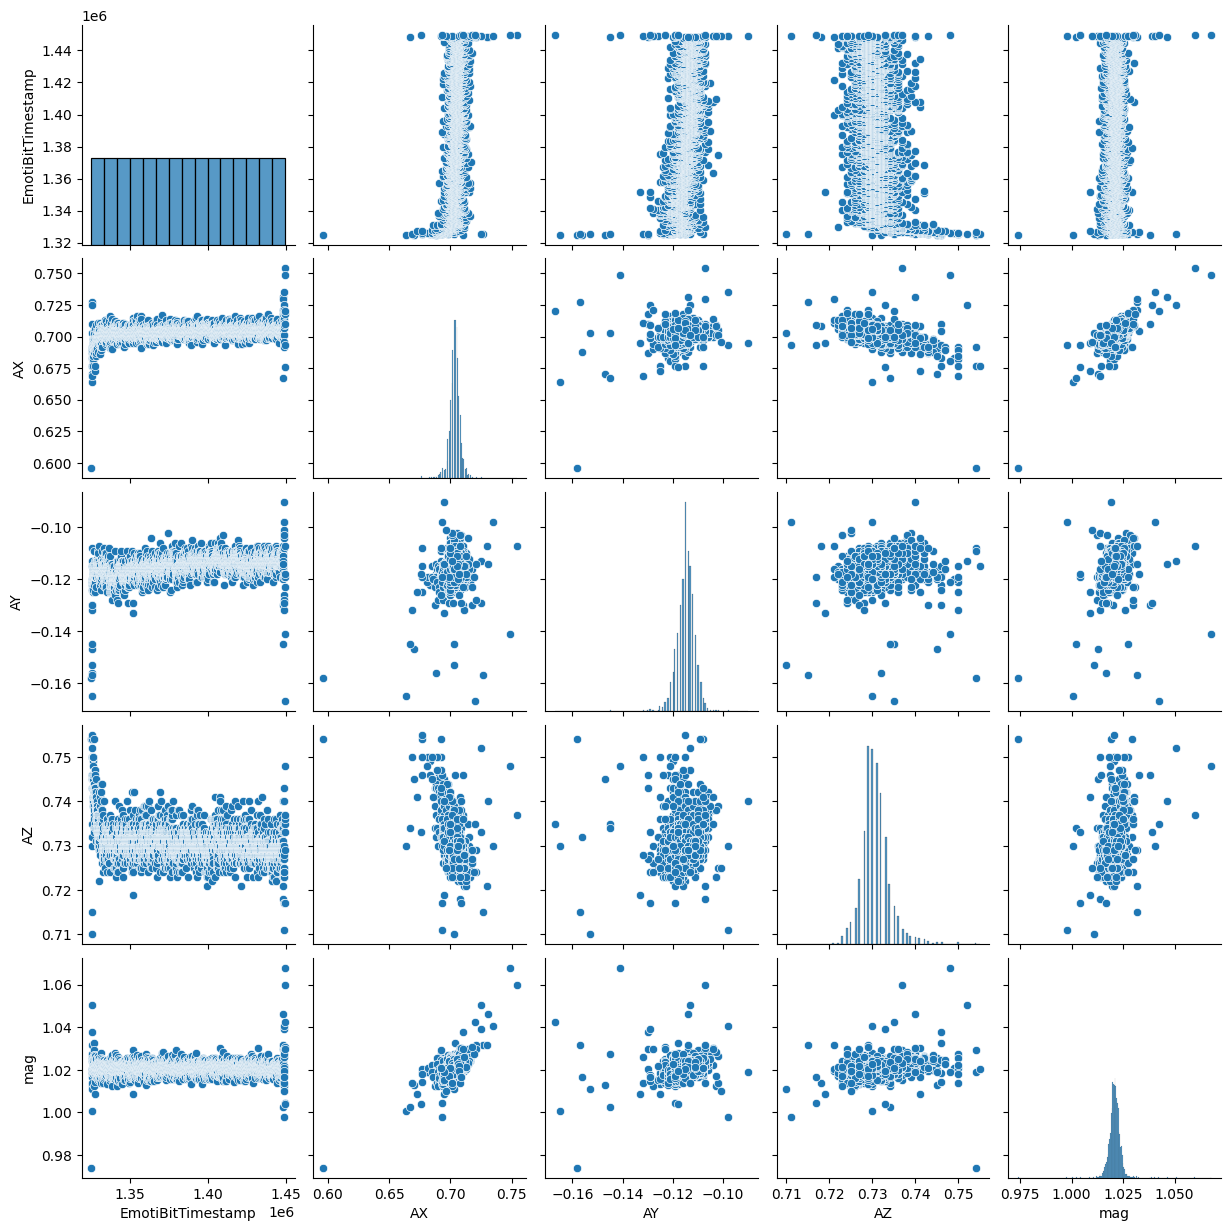

In [ ]:
#pairplot lying

#pairplot specific cols
spec_cols = ['EmotiBitTimestamp', 'AX', 'AY', 'AZ', 'mag']

sns.pairplot(lying_df_Axyz, vars=spec_cols)
plt.show()


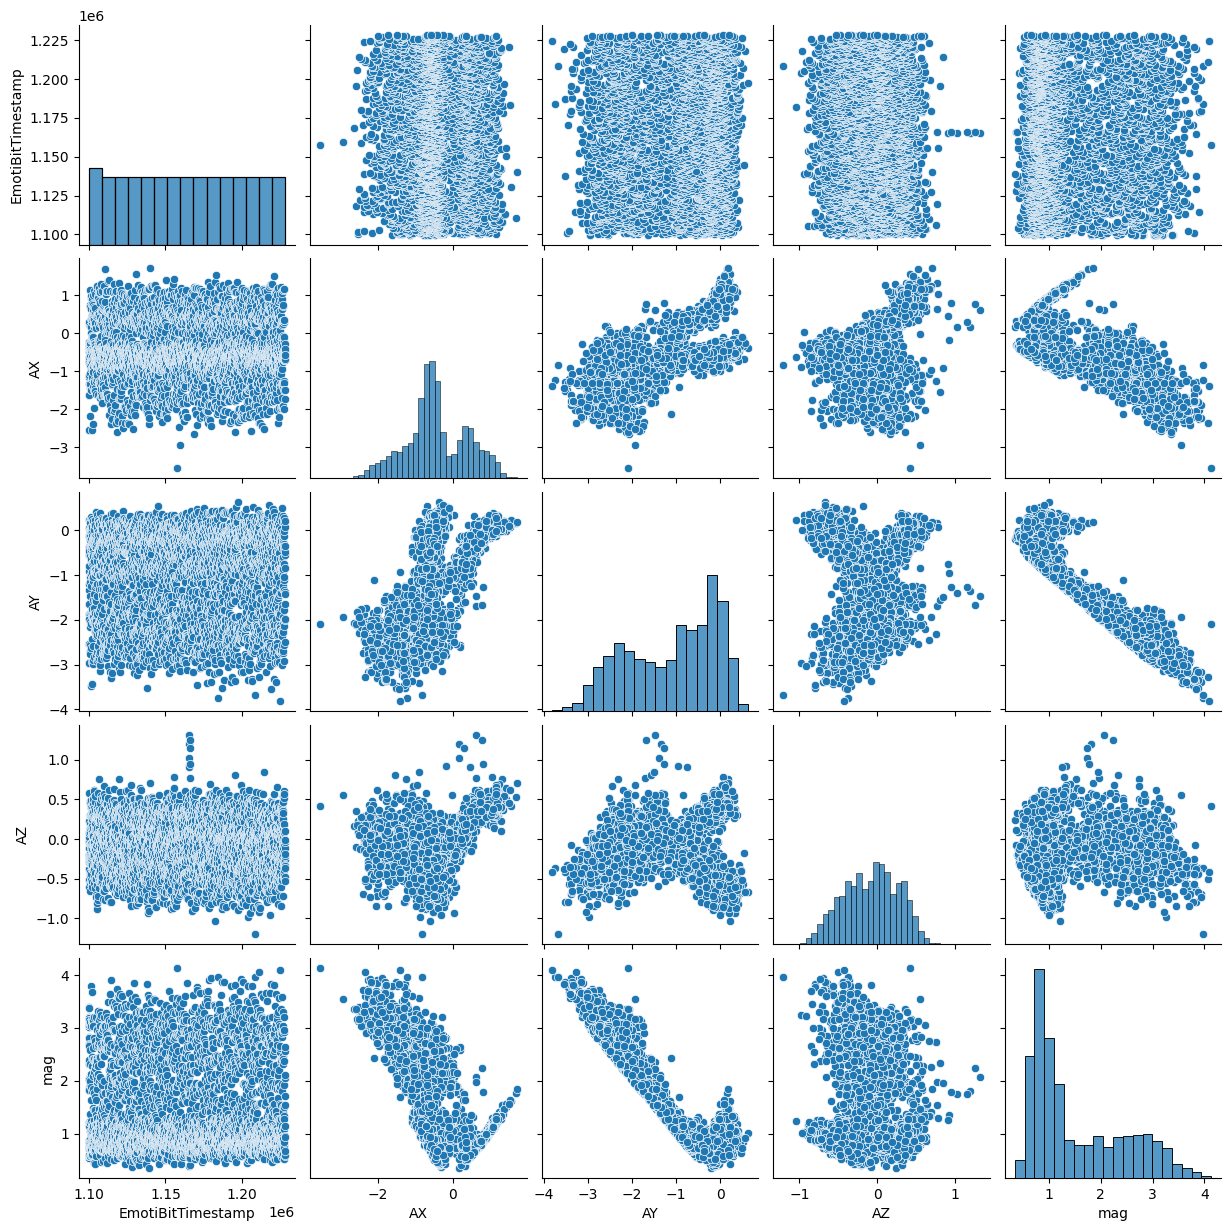

In [ ]:
#pairplot running
#pairplot specific cols
spec_cols = ['EmotiBitTimestamp', 'AX', 'AY', 'AZ', 'mag']

sns.pairplot(running_df_Axyz, vars=spec_cols)
plt.show()

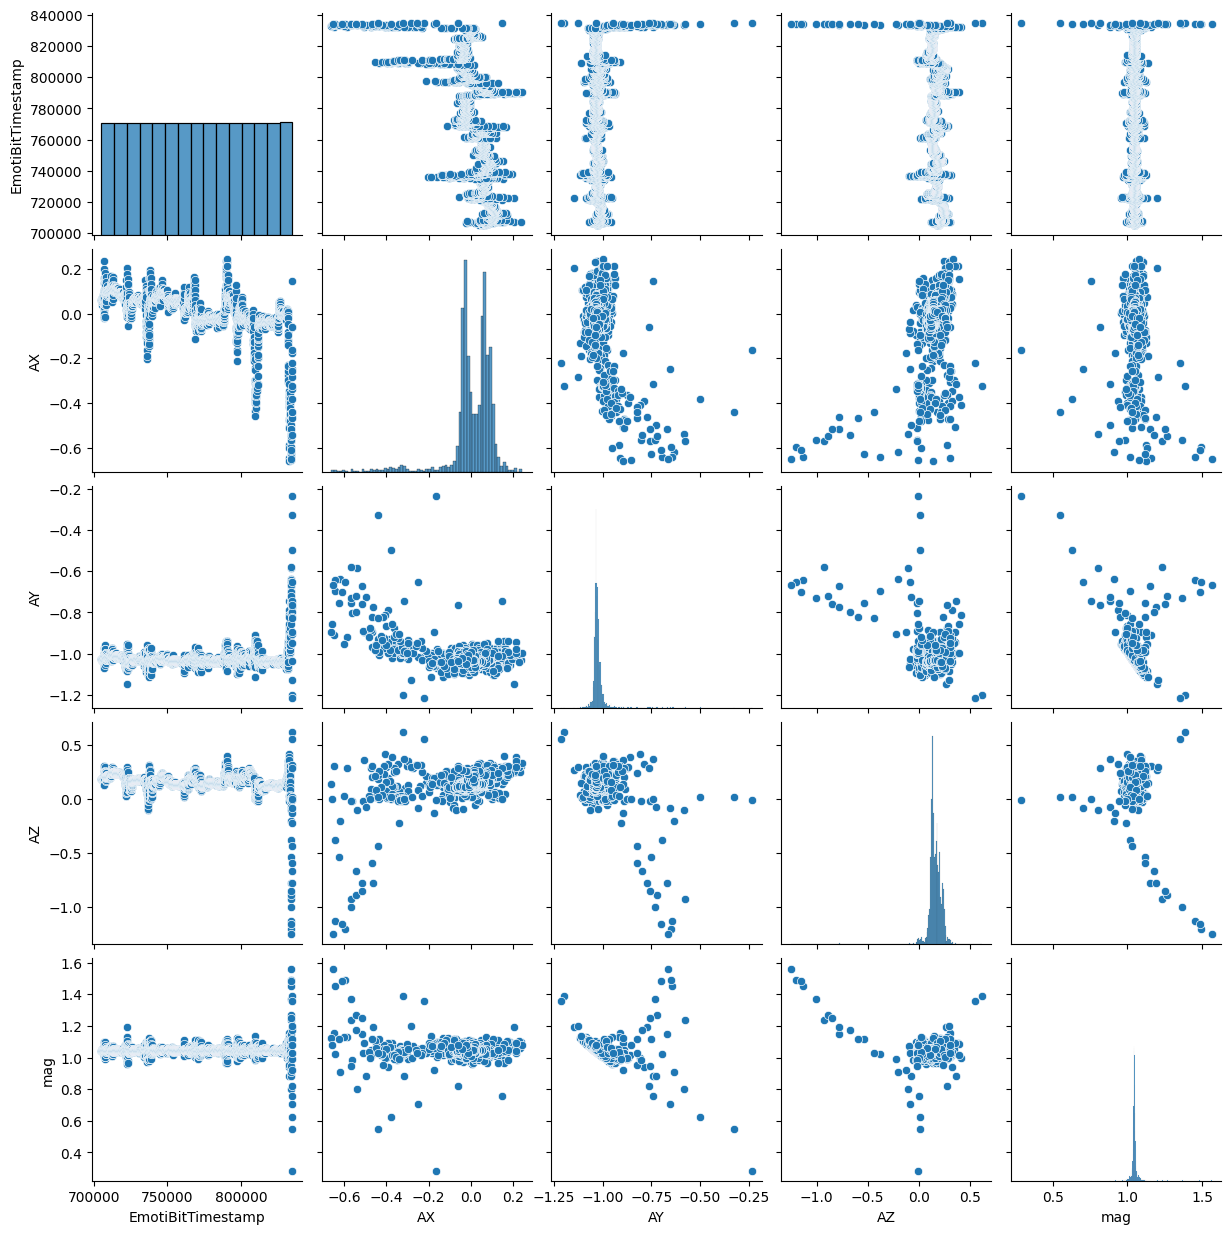

In [ ]:
#pairplot sitting

#pairplot specific cols
spec_cols = ['EmotiBitTimestamp', 'AX', 'AY', 'AZ', 'mag']

sns.pairplot(sitting_df_Axyz, vars=spec_cols)
plt.show()

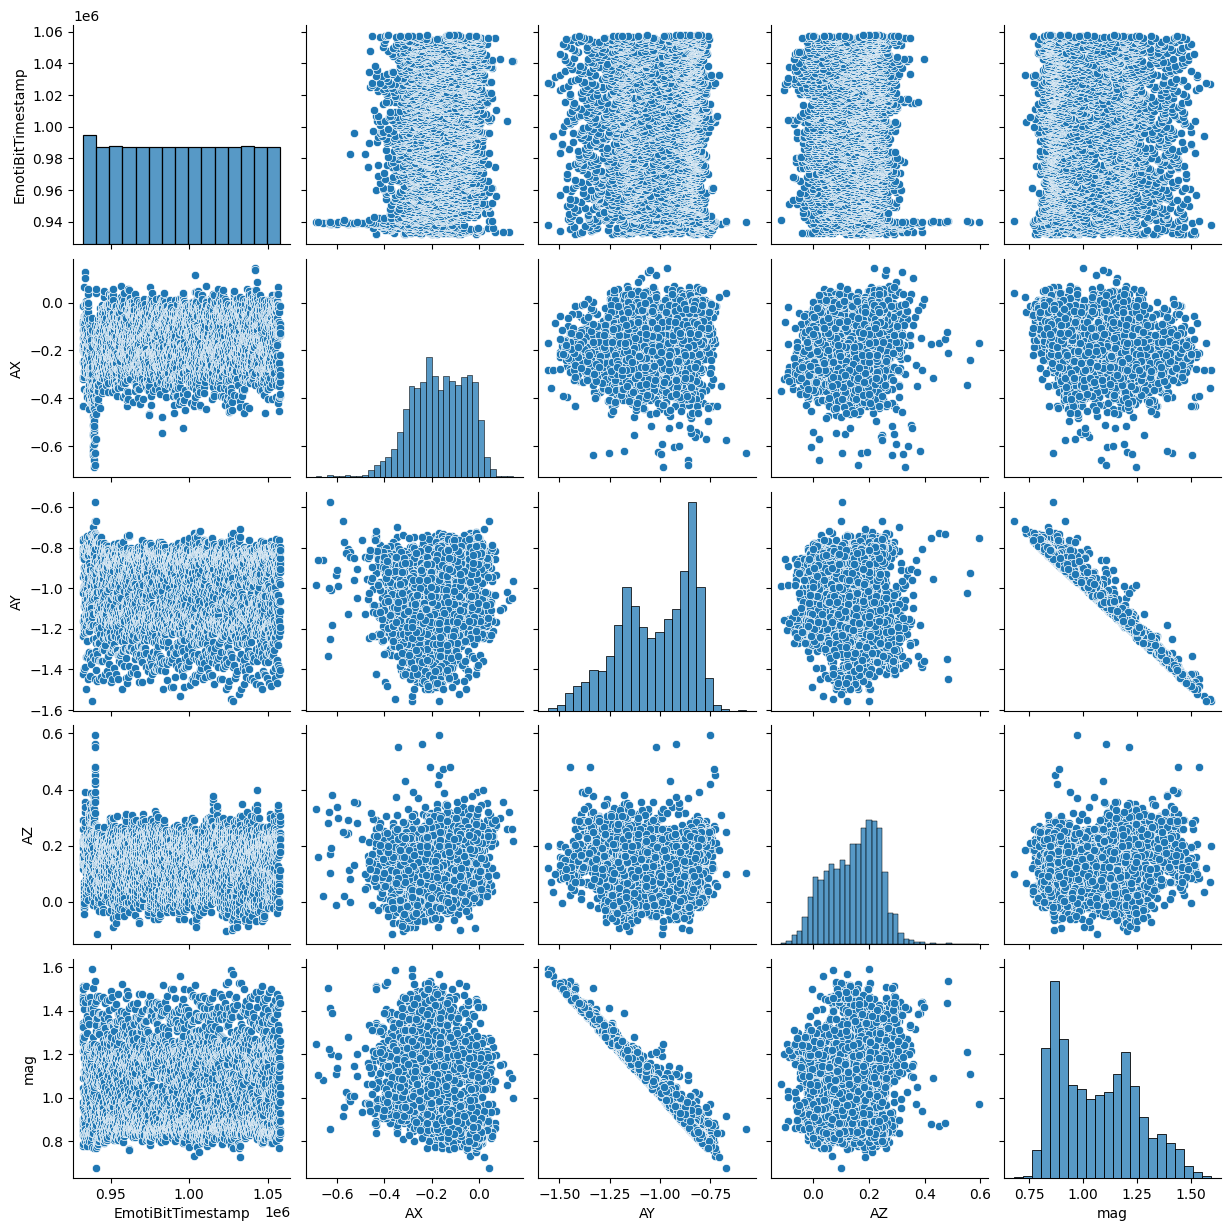

In [ ]:
#pairplot walking
#pairplot specific cols
spec_cols = ['EmotiBitTimestamp', 'AX', 'AY', 'AZ', 'mag']

sns.pairplot(walking_df_Axyz, vars=spec_cols)
plt.show()

In [ ]:
#heatmap

#plt.figure(figsize=(12,10))
#sns.heatmap(lying_df.corr(), annot=True, cmap='PiYG')
#plt.title("Feature Correlation Matrix",fontsize=20)
#plt.show()

# cols = ['AX','AY','AZ']

# plt.figure(figsize=(12,10))
# sns.heatmap(lying_df_Axyz.corr(), annot=True, cmap='PiYG')
# plt.title("Feature Correlation Matrix",fontsize=20)
# plt.show()


In [ ]:
#descriptive statistics
#gives summary of central tendency, dispersion, shade of dataset

print(lying_df_Axyz.describe())
print(running_df_Axyz.describe())
print(sitting_df_Axyz.describe())
print(walking_df_Axyz.describe())

       LocalTimestamp  EmotiBitTimestamp  DataReliability           AX  \
count    3.126000e+03       3.126000e+03           3126.0  3126.000000   
mean     1.760382e+09       1.387285e+06            100.0     0.703507   
std      3.596345e+01       3.596255e+04              0.0     0.005112   
min      1.760382e+09       1.325026e+06            100.0     0.596000   
25%      1.760382e+09       1.356153e+06            100.0     0.701000   
50%      1.760382e+09       1.387280e+06            100.0     0.704000   
75%      1.760382e+09       1.418420e+06            100.0     0.706000   
max      1.760382e+09       1.449547e+06            100.0     0.754000   

                AY           AZ          mag  
count  3126.000000  3126.000000  3126.000000  
mean     -0.114953     0.730832     1.020931  
std       0.004110     0.003672     0.003030  
min      -0.167000     0.710000     0.974010  
25%      -0.117000     0.729000     1.019549  
50%      -0.115000     0.730000     1.020938  
75% 